#**Frame Work And Tools Project**
###By :

####**Alhanouf Fawaz Aldossari**

ID: 444004951

####**Hanan adnan al-subhi**

ID:444006546

####**Maya Abudlraheem Tayeb**

ID:444002353

####**Sarah Mohammed Althobaiti**

ID:444004881



import

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# **phase 1: Data Wrangling and Exploration with Pandas**

**2.1 Dataset Overview :**

In [ ]:
# Load the dataset
df = pd.read_csv('/content/diabetes.csv')

# Display the number of rows and columns
print(f"Number of (rows, columns) = {df.shape}")

# Preview the first 5 rows of the dataset
print("\nDataset Preview:")
display(df.head())

# Display information about the DataFrame
print("\nInformation about DataFrame:")
df.info()

print("\nData types of each column in the dataset:")
display(df.dtypes)

print("\nlast 5 rows:")
display(df.tail())


Number of (rows, columns) = (768, 9)

Dataset Preview:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



Information about DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Data types of each column in the dataset:


,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64



last 5 rows:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


The dataset was loaded using the pd.read_csv() function, and it contains 768 rows and 9 columns. A preview of the first five rows was displayed, showing various features like Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, and Outcome.

The dataset contains no missing values, as all columns have 768 non-null entries. The columns are of the following data types:

int64 for most of the columns: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, Age, and Outcome.
float64 for BMI and DiabetesPedigreeFunction.
The dataset’s memory usage is 54.1 KB, and the information about the data types and non-null counts confirms that the dataset is complete with no missing or invalid data types.

**2.2 Data cleaning :**

In [ ]:
# Check for null values
null_counts = df.isnull().sum()
print(f"Check if there are null values in the dataset:\n{null_counts}")

# Check for duplicate rows
print("\nChecking for duplicate rows in the dataset:")
duplicate_rows = df[df.duplicated()]

# Display results
if not duplicate_rows.empty:
    print(f"Duplicate rows found:\n{duplicate_rows}")
else:
    print("No duplicate rows found in the dataset.")



Check if there are null values in the dataset:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Checking for duplicate rows in the dataset:
No duplicate rows found in the dataset.


The analysis revealed that there are no null values in the dataset, as all columns showed a count of zero for missing values. This was confirmed by checking each column for null entries using the isnull() method. Additionally, a check for duplicate rows was performed, and it was determined that there were no duplicate rows in the dataset, as the duplicated() method returned an empty result.

**2.2 Data cleaning :**

Shape before filtered DataFrame: (768, 9)
Shape after filtered DataFrame: (639, 9)
Number of rows removed: 129


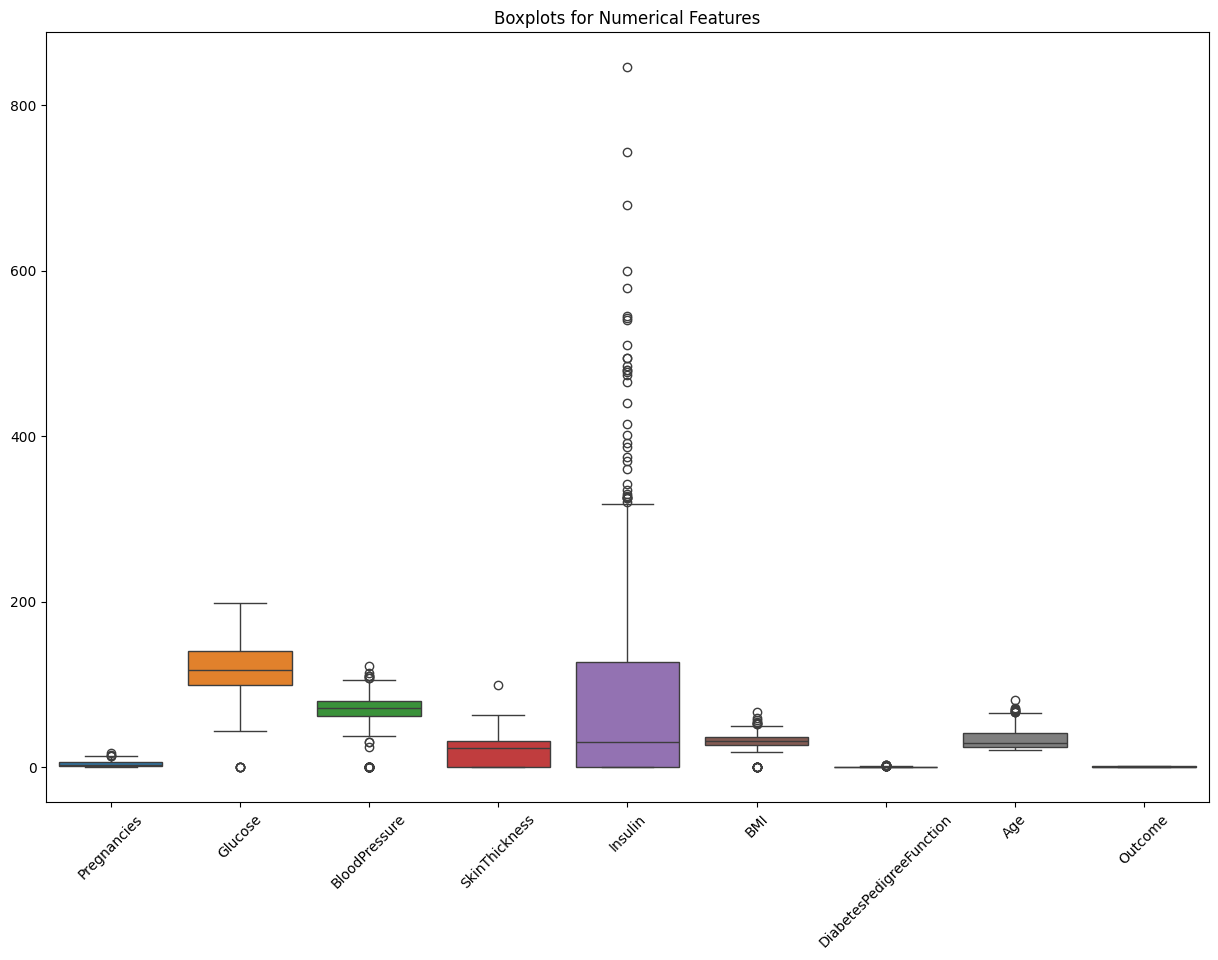

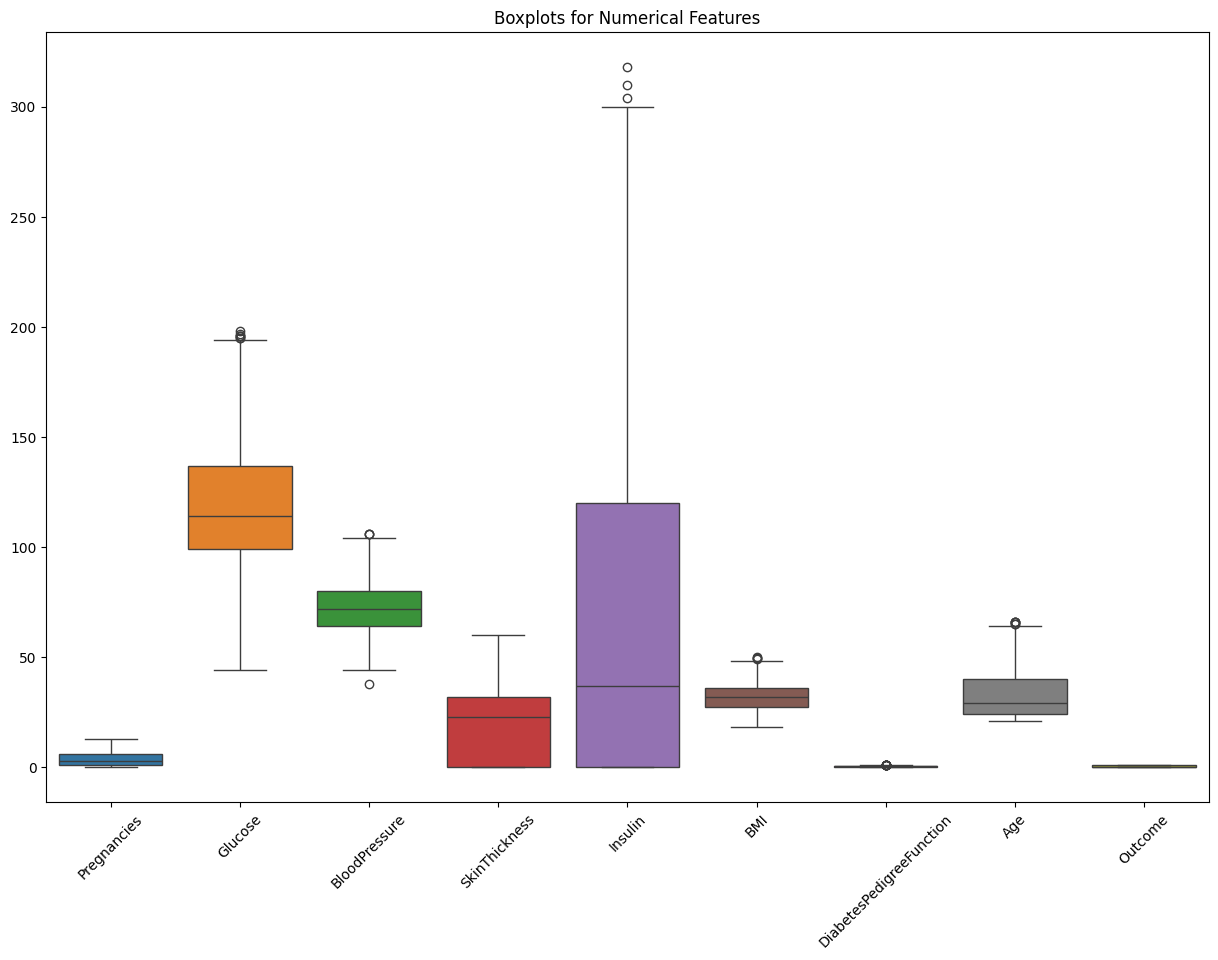

In [ ]:
# Calculate the first quartile (Q1) and third quartile (Q3) for the numerical data
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to exclude rows with values outside the IQR bounds
filtered_df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

# Print the shape of the filtered DataFrame (before any removal)
print("Shape before filtered DataFrame:", df.shape)

# Print the shape of the filtered DataFrame (after removing outliers)
print("Shape after filtered DataFrame:", filtered_df.shape)

# Print the number of removed rows
print("Number of rows removed:", len(df) - len(filtered_df))

# Plot the boxplot for the original DataFrame (with potential outliers)
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.title("Boxplots for Numerical Features")
plt.xticks(rotation=45)
plt.show()

# Plot the boxplot for the filtered DataFrame (with outliers removed)
plt.figure(figsize=(15, 10))
sns.boxplot(data=filtered_df)
plt.title("Boxplots for Numerical Features")
plt.xticks(rotation=45)
plt.show()


Before filtering, the dataset contained many outliers, as seen in the first boxplot, which showed significant inconsistencies in the data distribution. The original DataFrame had a shape of (768, 9). After applying the outlier removal process, 129 rows were removed, resulting in a filtered DataFrame with a shape of (639, 9). The second boxplot, after the removal of outliers, displays a much more consistent distribution of numerical features, suggesting that the data is now cleaner and more reliable for further analysis.

**2.3 Exploratory Data Analysis (EDA)**

Statistics Summary



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000



Median:


,0
Pregnancies,3.0000
Glucose,117.0000
BloodPressure,72.0000
SkinThickness,23.0000
Insulin,30.5000
BMI,32.0000
DiabetesPedigreeFunction,0.3725
Age,29.0000
Outcome,0.0000



Variance:


,0
Pregnancies,11.354056
Glucose,1022.248314
BloodPressure,374.647271
SkinThickness,254.473245
Insulin,13281.180078
BMI,62.159984
DiabetesPedigreeFunction,0.109779
Age,138.303046
Outcome,0.227483


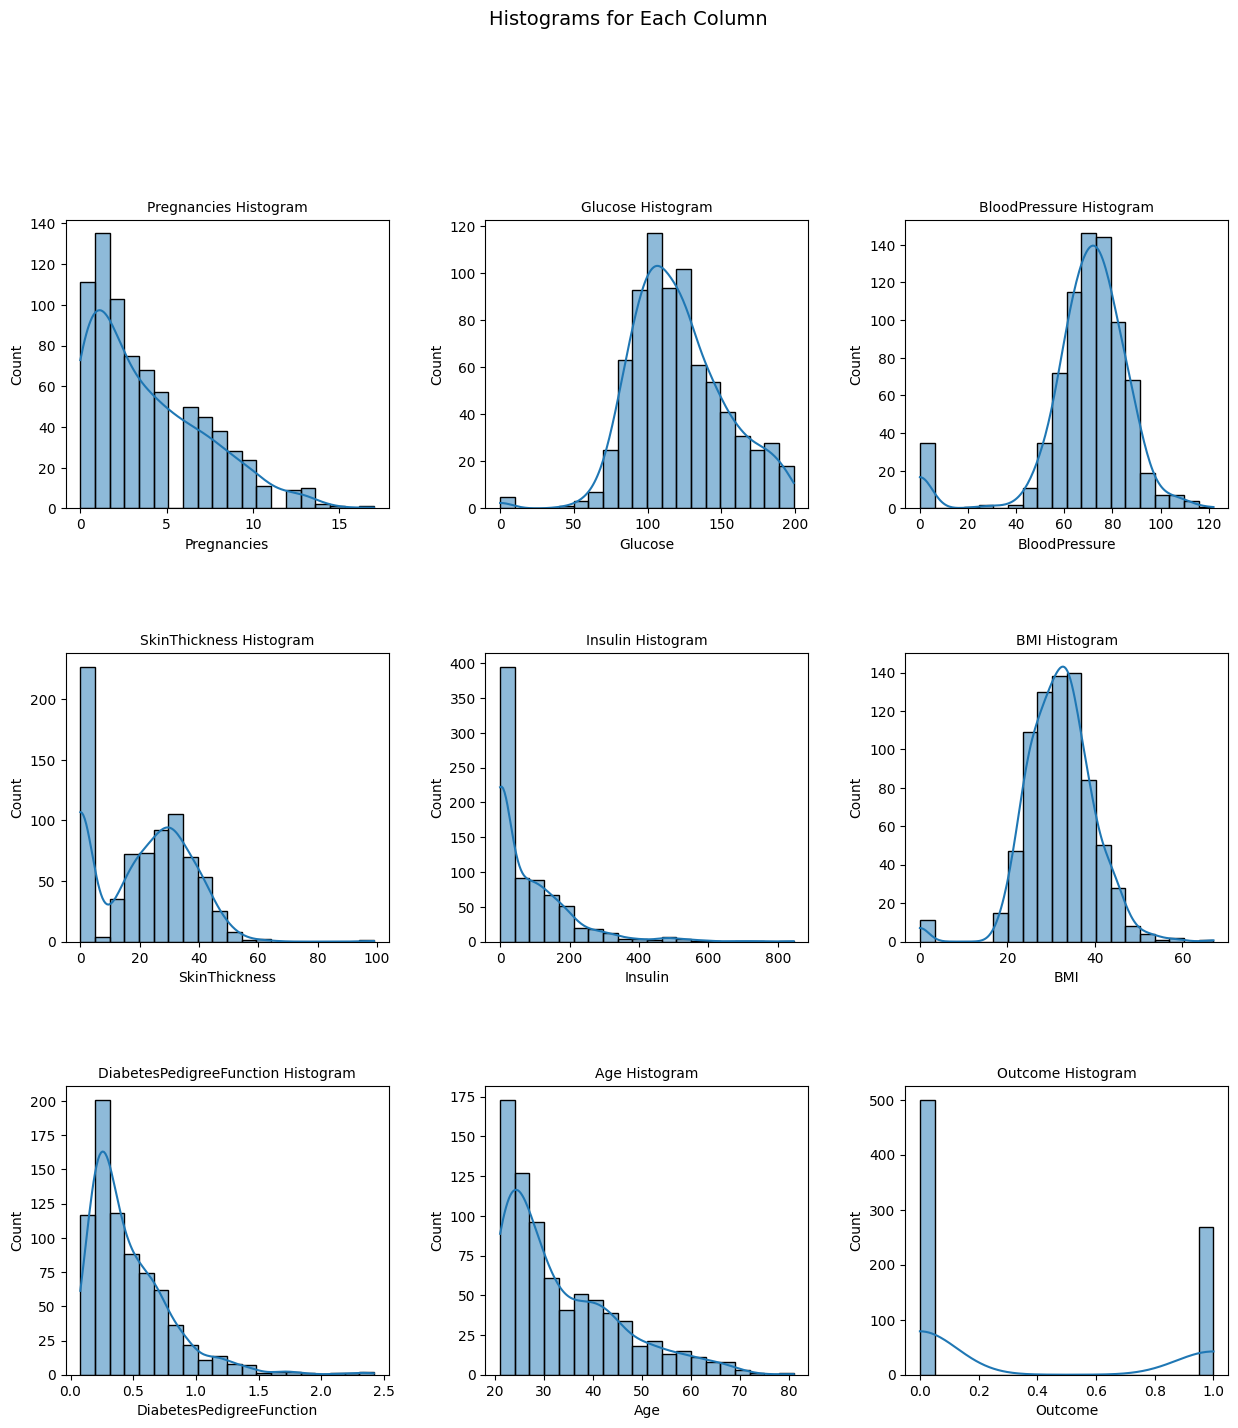

In [ ]:
# Load dataset
filted_df = pd.read_csv('diabetes.csv')

# Summary statistics with Median ans Variance
print("Statistics Summary\n")
display(filted_df.describe())

print("\nMedian:")
display(filted_df.median())

print("\nVariance:")
display(filted_df.var())

# Histograms
num_columns = len(filted_df.columns)
num_rows = (num_columns // 3) + (num_columns % 3 > 0)  #3 columns per row

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten axes to simplify indexing

# Plot each column
for i, column in enumerate(filted_df.columns):
    if filted_df[column].dtype != 'object':  # Only for numerical columns
        sns.histplot(data=filted_df, x=column, kde=True, bins=20, ax=axes[i])
        axes[i].set_title(f"{column} Histogram", fontsize=10)  # Adjust title font size
    else:
        axes[i].remove()  # Remove axes for non-numeric columns

# Remove any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and spacing
fig.subplots_adjust(hspace=0.5, wspace=0.3)  # Adjust vertical (hspace) and horizontal (wspace) space
plt.suptitle("Histograms for Each Column", fontsize=14, y=1.02)  # Adjust main title position
plt.show()

1- The statistical summary complements the visualizations, helping confirm data trends and potential preprocessing steps, such as handling missing values, normalizing skewed data, and addressing class imbalance.

- The Median Provides the median (middle value) for each numerical column, offering insights into central tendencies.

- Variance Displays the variance for each column. Larger variance indicates more significant spread in the data.

2-The histograms provide a clear visualization of data distribution, potential missing data.
Each histogram represents the distribution of a specific column in the dataset, helping identify patterns such as skewness, modality, or the presence of outliers.

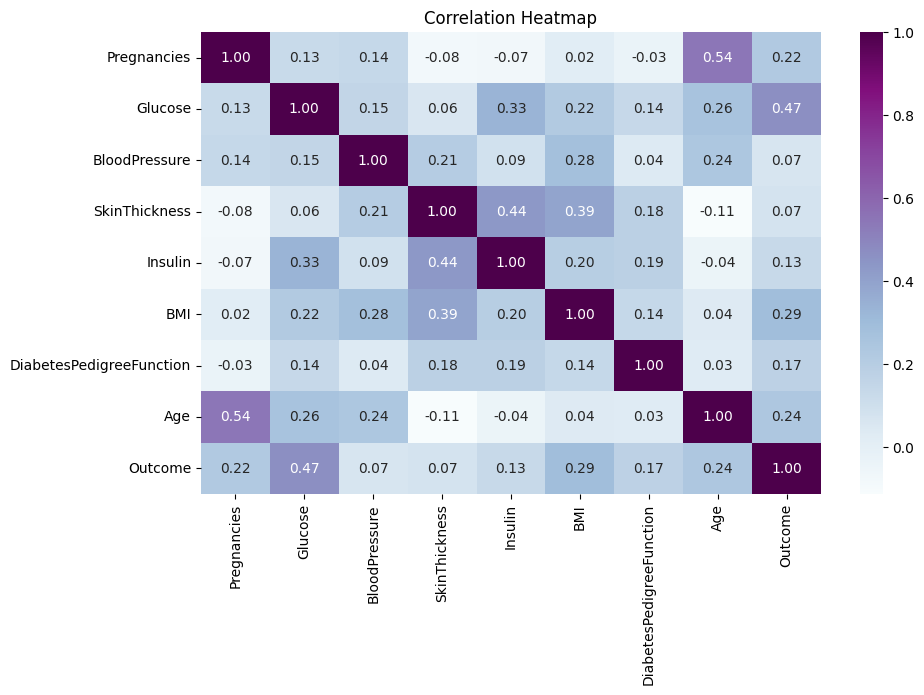

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(filted_df.corr(), annot=True, cmap="BuPu", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


The features with higher correlation to the target variable (Outcome) might be important predictors for diabetes.

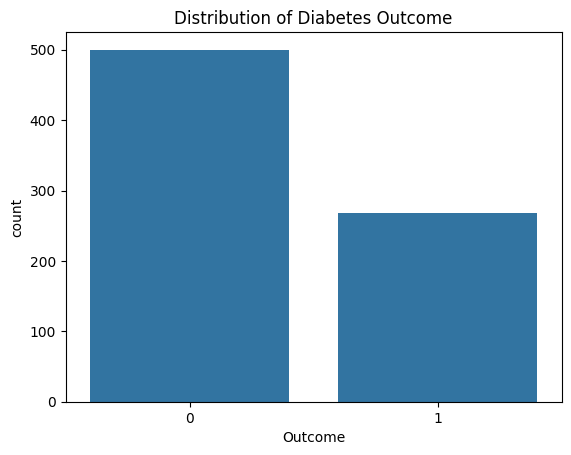

In [ ]:
# 1 indicates that the patient has diabetes, and 0 indicates they do not.
sns.countplot(x='Outcome', data=filted_df)
plt.title('Distribution of Diabetes Outcome')
plt.show()

A significantly larger number of individuals in the dataset are non-diabetic (Outcome = 0) compared to diabetic individuals (Outcome = 1).
The class imbalance suggests that the dataset contains more non-diabetic cases than diabetic cases, which is common in real-world medical datasets.

**2.4 Data Manipulation**

In [ ]:
# Create two separate DataFrames from 'Age' and 'BMI'
age_df = filted_df[['Age']].reset_index()  # Extract 'Age' and reset the index
bmi_df = filted_df[['BMI']].reset_index()  # Extract 'BMI' and reset the index

# Merge the two DataFrames on the 'index' column
merged_df = pd.merge(age_df, bmi_df, on='index')

#Add a new column that captures the interaction between Age and BMI
merged_df['BMI_Age_Trend'] = merged_df['Age'] * merged_df['BMI']

#Merge this new feature back into the original DataFrame
final_df = pd.merge(filted_df, merged_df[['index', 'BMI_Age_Trend']], left_index=True, right_on='index').drop(columns=['index'])

# Display the first five rows of the final DataFrame
display(final_df.head())

# Filter rows where Glucose is greater than 140 (indicative of high risk)
high_glucose = filted_df[filted_df['Glucose'] > 140]
print("\nHigh Glucose Levels")
display(high_glucose.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Age_Trend
0,6,148,72,35,0,33.6,0.627,50,1,1680.0
1,1,85,66,29,0,26.6,0.351,31,0,824.6
2,8,183,64,0,0,23.3,0.672,32,1,745.6
3,1,89,66,23,94,28.1,0.167,21,0,590.1
4,0,137,40,35,168,43.1,2.288,33,1,1422.3



High Glucose Levels


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
8,2,197,70,45,543,30.5,0.158,53,1
11,10,168,74,0,0,38.0,0.537,34,1
13,1,189,60,23,846,30.1,0.398,59,1


We performs feature engineering by creating a new feature (BMI_Age_Trend) to capture the interaction between Age and BMI. We also filters the dataset to analyze individuals with high glucose levels.

1. Merging Age and BMI to Create a New Feature (BMI_Age_Trend)

- two separate DataFrames (age_df and bmi_df) are created, each
containing one of the original columns (Age and BMI).
- The merge function is used to combine the two DataFrames based on their index.
- A new column (BMI_Age_Trend) is created by multiplying Age and BMI to capture their interaction.
- The new feature is merged back into the original dataset (final_df) and displayed.


2. Filtering Individuals with High Glucose Levels (Glucose > 140)
- The dataset is filtered to select rows where the Glucose value is greater than 140, indicating a high risk of diabetes.
- The display(high_glucose.head()) function is used to show the first five rows of the filtered dataset.


# **Phase 2: Numerical Computation with NumPy**

In [ ]:
# converts a Pandas DataFrame into a NumPy array for easier math calculations.
data = filtered_df.to_numpy()

part 1:
Perform vectorized operations and array manipulations for performance optimization.

In [ ]:
# Ensure filtered_df is a copy of the original DataFrame to avoid the warning
# square the BMI values and store them in a new column.
filtered_df = filtered_df.copy()
bmi_squared = data[:, 5] ** 2
# Use .loc[] to explicitly modify the DataFrame and avoid SettingWithCopyWarning
filtered_df.loc[:, "BMI_Squared"] = bmi_squared
print(filtered_df[['BMI', 'BMI_Squared']].head())

    BMI  BMI_Squared
0  33.6      1128.96
1  26.6       707.56
2  23.3       542.89
3  28.1       789.61
5  25.6       655.36


In [ ]:
# filtered version of the Glucose column, where Glucose values over 120.
glucose = data[:, 1]
filtered_glucose = np.where(data[:, 1] > 120, data[:, 1], np.nan)
filtered_df.loc[:, "filtered_glucose"] = filtered_glucose
print("DataFrame with Filtered Glucose Column:")
print(filtered_df[['Glucose', 'filtered_glucose']].head())

DataFrame with Filtered Glucose Column:
   Glucose  filtered_glucose
0      148             148.0
1       85               NaN
2      183             183.0
3       89               NaN
5      116               NaN


We effectively utilized NumPy to perform numerical computations, emphasizing performance optimization through vectorized operations and array manipulations.

part 2: Calculate statistical measures such as mean, median, variance, and correlation using NumPy.

In [ ]:
Age = data[:, 7]

## Calculate the mean, median, and variance of Age
print(f"Mean Age: {np.mean(Age)}")
print(f"Median Age: {np.median(Age)}")
print(f"Variance Age: {np.var(Age)}")

## compute the correlation between Age and BloodPressure.
BloodPressure = data[:, 2]
correlation = np.corrcoef(Age, BloodPressure)[0, 1]
print(f"Correlation between Age and BloodPressure: {correlation}")

Mean Age: 32.715179968701094
Median Age: 29.0
Variance Age: 122.58867410689139
Correlation between Age and BloodPressure: 0.35403560502631776


Statistical measures such as mean, median, variance, and correlation were calculated to extract valuable insights from the dataset, enhancing our understanding of the relationships between variables.

part 3: Implement custom algorithms for matrix operations to solidify understanding of numerical computing principles.

In [ ]:
## first algorithm that Calculate the determinant of the matrix:
def determinant(A):
    if len(A) == 2:
        return A[0][0] * A[1][1] - A[0][1] * A[1][0]
    return sum((-1) ** c * A[0][c] * determinant(minor(A, 0, c)) for c in range(len(A)))

def minor(A, i, j):
    return [row[:j] + row[j+1:] for row in (A[:i] + A[i+1:])]

# matrix contain Age and BloodPressure
matrix = data[:2, [7, 2]]
print("Determinant of the Matrix:", determinant(matrix))

## Calculate the determinant of the matrix using NumPy
det_A = np.linalg.det(matrix)
print("Determinant using NumPy:", det_A)

Determinant of the Matrix: 1068.0
Determinant using NumPy: 1067.9999999999993


In [ ]:
## second algorithm that Calculate the multiplication of the matrix:
def matrix_multiplication(A, B):
    if len(A[0]) != len(B):
        raise ValueError("Number of columns in A must equal number of rows in B.")
    return [[sum(A[i][k] * B[k][j] for k in range(len(B))) for j in range(len(B[0]))] for i in range(len(A))]

A = matrix
B = matrix.T
result = matrix_multiplication(A.tolist(), B.tolist())

# The result is printed for the first 5 rows and columns for large matrices to save on computation time.
print("Matrix Multiplication Result (Sample):")
for row in result[:5]:
    print(row[:5])

# Matrix multiplication using NumPy
# The result also printed for the first 5 rows and columns for large matrices to save on computation time.
print("Matrix Multiplication using NumPy (Sample):")
result = np.dot(A, B)
print(result[:5, :5])

Matrix Multiplication Result (Sample):
[7684.0, 6302.0]
[6302.0, 5317.0]
Matrix Multiplication using NumPy (Sample):
[[7684. 6302.]
 [6302. 5317.]]


In [ ]:
## third algorithm that Calculate the frobenius norm of the matrix:

## first we Extract the Glucose column as a NumPy array
Glucose = filtered_df["Glucose"].to_numpy()
BMI = filtered_df["BMI"].to_numpy()

# Combine the first two rows of Glucose and BMI into a new matrix using column_stack.
matrix2 = np.column_stack((Glucose[:2], BMI[:2]))

# Function to calculate the Frobenius norm manually by summing the squares of all elements in the matrix.
def frobenius_norm(matrix2):
    sum_of_squares = 0
    for row in matrix:
        for element in row:
            sum_of_squares += element ** 2
    return sum_of_squares ** 0.5

print("Frobenius Norm:", frobenius_norm(matrix))

# Function to calculate the Frobenius norm using NumPy
def frobenius_norm_numpy(matrix2):
    return np.linalg.norm(matrix, 'fro')

frobenius_norm_value = frobenius_norm_numpy(matrix2)
print("Frobenius Norm (NumPy):", frobenius_norm_value)

Frobenius Norm: 114.02192771568107
Frobenius Norm (NumPy): 114.02192771568107


Additionally, implementing custom algorithms for matrix operations, such as multiplication, determinants, and norms, reinforced our grasp of numerical computing principles and provided deeper insights into the dataset.

This combination of techniques highlights the power and flexibility of NumPy for efficient data analysis and numerical problem-solving.


# **phase 3: Machine Learning with Scikit-learn**


**splitting datasets** tool in Scikit-learn's that splits
the dataset into training and test sets.

In [ ]:
X = filtered_df.iloc[:, 0:8]  #all columns
y = filtered_df['Outcome']

# Train Test Split,# Divide the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Naive Bayes model**

In [ ]:
# bulid model

# Initialize the Naive Bayes model
model = GaussianNB()

# Fit the model using the training data
model.fit(X_train, y_train)

#Uses the trained model to predict the outcomes for the testing data (X_test).
y_pred = model.predict(X_test)


In [ ]:
# Evaluate model
# y_test is the actual labels of testing data (X_test) to compare it with y_pred
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-validation scores: {scores}")

Accuracy: 0.7890625
Confusion Matrix:
[[81 11]
 [16 20]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        92
           1       0.65      0.56      0.60        36

    accuracy                           0.79       128
   macro avg       0.74      0.72      0.73       128
weighted avg       0.78      0.79      0.78       128

Cross-validation scores: [0.7421875  0.734375   0.734375   0.796875   0.79527559]


<Figure size 800x600 with 0 Axes>

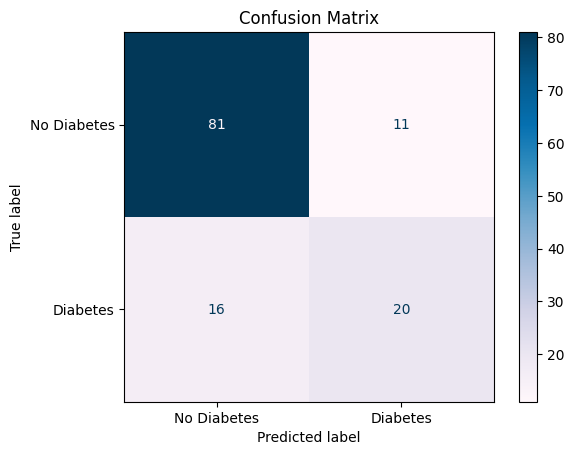

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Diabetes', 'Diabetes'])

plt.figure(figsize=(8, 6))
cmd.plot(cmap='PuBu')
plt.title('Confusion Matrix')
plt.show()

An accuracy of 78.91% for a Naive Bayes model means that the model correctly predicted the outcomes of the test data approximately 79%.

**Now we apply Random Frorest model**

In [ ]:
# Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model using the training data. So, the model learns patterns in the data
model.fit(X_train, y_train)

# Use the trained Random Forest model to predict the target labels for the test data (X_test).
y_pred = model.predict(X_test)

In [ ]:
# Evaluate model
# y_test is the actual labels of testing data (X_test) to compare it with y_pred
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-validation scores: {scores}")

Accuracy: 0.8046875
Confusion Matrix:
[[83  9]
 [16 20]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        92
           1       0.69      0.56      0.62        36

    accuracy                           0.80       128
   macro avg       0.76      0.73      0.74       128
weighted avg       0.80      0.80      0.80       128

Cross-validation scores: [0.7890625  0.765625   0.734375   0.8046875  0.77952756]


<Figure size 800x600 with 0 Axes>

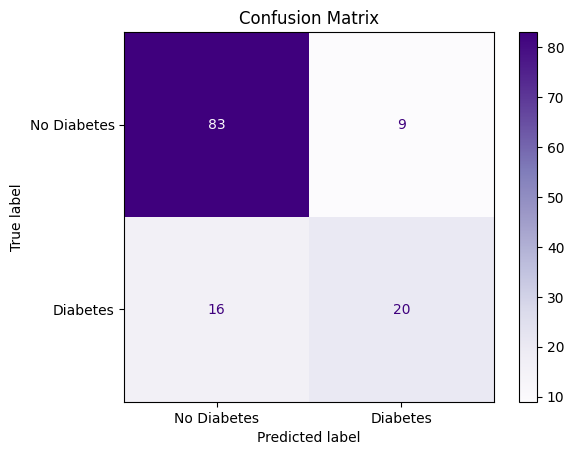

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Diabetes', 'Diabetes'])

plt.figure(figsize=(8, 6))
cmd.plot(cmap='Purples')
plt.title('Confusion Matrix')
plt.show()

The model achieved an accuracy of **80.47%**, indicating that it correctly classified approximately 80% of the test cases. This is a solid performance, suggesting that the Random Forest Classifier is effective at distinguishing between the two categories ("No Diabetes" and "Diabetes") in the dataset.